In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [40]:
X = pd.read_csv('../data/outputx.csv')
y = pd.read_csv('../data/outputy.csv')
y[y == 1] = 0
y[y == 2] = 1

In [92]:
y.shape

(1797, 1)

In [200]:
class Trainer:
    def __init__(self, X, y) -> None:
        self.X = X
        self.y = y
        self.classifiers = []
        self.total_classifiers = 51
    
    def fit(self):
        for i in range(self.total_classifiers):
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.1, stratify=self.y)
            clf = DecisionTreeClassifier(max_depth=1)
            clf.fit(X_train, y_train)
            self.classifiers.append(clf)

            #plt.figure(figsize=(8, 6))
            #plot_tree(self.classifiers[i], filled=True)
            #plt.show()
    
    def predict(self, X):
        p = pd.DataFrame({0:np.zeros(len(X)), 1:np.zeros(len(X))})
        for clf in self.classifiers:
            predict = clf.predict(X)
            p[0][predict == 0] +=1
            p[1][predict == 1] +=1
        #predict = pd.DataFrame({"prediction": np.zeros(len(X))})
        predict = pd.DataFrame( np.zeros(len(X)))
        predict[p[0] > p[1]] = 0
        predict[p[0] < p[1]] = 1
        predict = predict.astype(int)
        return predict


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, stratify=y)
trainer = Trainer(X, y)
trainer.fit()
y_pred = trainer.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("accuracy", (tp + tn) / (tp + tn + fp + fn))
print("sensitivity", tp / (tp + fn))
print("specificity", tn / (tn + fp))


accuracy 0.8317107093184979
sensitivity 0.8328690807799443
specificity 0.8305555555555556


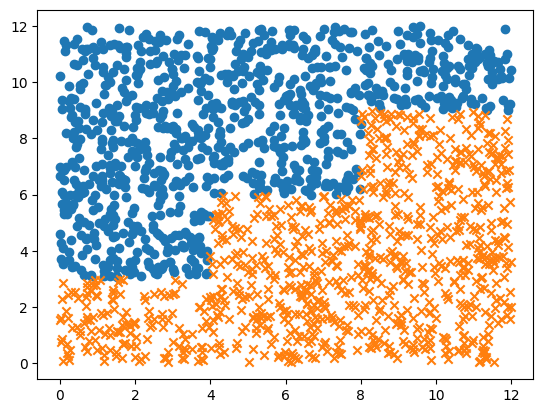

In [180]:
plt.figure()

plt.scatter(X['feat1'][y['target'] == 0], X['feat2'][y['target'] == 0], marker='o')
plt.scatter(X['feat1'][y['target'] == 1], X['feat2'][y['target'] == 1], marker='x')

plt.show()

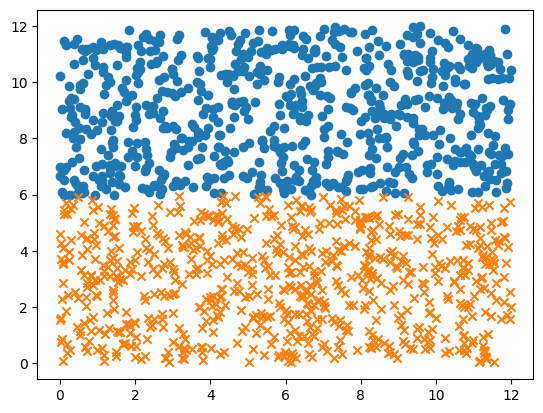

In [201]:
plt.figure()

X_test_reset = X_test.reset_index(drop=True)

plt.scatter(X_test_reset['feat1'][y_pred[0] == 0], X_test_reset['feat2'][y_pred[0] == 0], marker='o')
plt.scatter(X_test_reset['feat1'][y_pred[0] == 1], X_test_reset['feat2'][y_pred[0] == 1], marker='x')

plt.show()

In [194]:

print(y_pred.shape)
print(X_test.shape)

X_test_reset = X_test.reset_index(drop=True)
print(X_test_reset[y_pred[0] == 0])
print(X_test_reset[y_pred[0] == 1])


# y_pred[0] == 0
#print(X_test[y_pred[0] == 0])

(1438, 1)
(1438, 2)
         feat1    feat2
1      1.51240  10.6140
3      2.62880   6.8634
4      3.33530   7.2703
7      5.79990   9.9989
8      8.60340   8.0149
...        ...      ...
1430  11.12300   7.6364
1431   0.40343   5.9870
1432   6.47570  11.6440
1434   1.60840  11.2160
1436   3.94180   8.3853

[715 rows x 2 columns]
         feat1   feat2
0      2.70930  3.3888
2      1.47300  5.1146
5      4.24780  1.8365
6      2.92520  3.6098
9      8.42690  5.2697
...        ...     ...
1425   5.29670  1.9928
1427   0.88316  5.4427
1433   8.73780  2.4089
1435  10.63300  3.1320
1437   1.37610  5.4826

[723 rows x 2 columns]
